In [1]:
# Neural Network Class Definition

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special # needed to use the sigmoid activation function expit()
import time

In [12]:
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes,learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # link weight matrices, weights sampled from a normal distribution
        # np.random.normal (mean:0 ,std: 1/sqrt (of incoming links),(size : int or tuple of ints))
        
        self.wih = np.random.normal(0.0, pow (self.inodes,-0.5), (self.hnodes,self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes,self.hnodes))
        
        # Activation function : sigmoid: expit(x), imported from scipy.special
        
        self.activation_function = lambda x : scipy.special.expit(x)
        
        
    
    def train(self, inputs_list, targets_list):
        
        # Converting inputs into a 2D array
        inputs = np.array(inputs_list, ndmin = 2).T  # .T performs transpose
        targets = np.array(targets_list, ndmin = 2).T
        
        # Propagating the input signals forward
        # Calculate signals into hidden layer : dot product of weight and input matrices
        hidden_inputs = np.dot(self.wih, inputs)
        
        # Calculate signals emerging from hidden layer : sigmoid activation function applied
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # Calculate signals out of final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #  Calculation of errors
        output_errors = targets - final_outputs
        
        # Backpropagation: adjustments of weights based on output errors
        
        # Hidden layer errors : output layer errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # updating weights between hidden and output layers
        # Delta W_jk = lr * [E_k * sigmoid(O_k) * (1-sigmoid(O_k))] * [O_j]
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # Updating weights between input and hidden layers
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), np.transpose(inputs))
        
         
    
    # Query the neural network, i.e. forward propagate the inputs
    def query(self, inputs_list):
        
        # Convert input list to 2-D array
        inputs = np.array(inputs_list, ndmin = 2).T # .T performs transpose
        
        # Signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
         
        # Calculate signals out of the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Signals into output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # Signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [13]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

# Create instance of a neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [14]:
# Load training data from MNIST csv file
training_data_file = open("/home/atanu/Desktop/mlds/codes/ann_rashid/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [15]:
# Training the network

epochs = 5 # The number of times the training data is used for training
t0 = time.process_time() # Starting clock to measure time
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01  # Scale and shift the inputs
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])]=0.99 # all_values[0] is the target label for this record
        n.train(inputs,targets)
t1 = time.process_time()-t0
print('Training time for {} epoch(s) is {:.1f} s'.format(epochs,t1))

Training time for 5 epoch(s) is 333.3 s


In [16]:
# Testing the network

test_data_file = open("/home/atanu/Desktop/mlds/codes/ann_rashid/mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [17]:
# Testing against the full data set

t2 = time.process_time()
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0]) # First number in the list
    #print(correct_label,  'correct label')
    inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01 #rescaling inputs
    outputs = n.query(inputs) # query the network
    label = np.argmax(outputs)
    #print(label, "network's answer")
    if label ==correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
#print(scorecard)

t3 = time.process_time()-t2


# Calculate the performance score

scorecard_array=np.asarray(scorecard)
performance=scorecard_array.sum()/scorecard_array.size
print("No. of input nodes : {}".format(input_nodes))
print("No. of hidden nodes : {}".format(hidden_nodes))
print("No. of output nodes : {}".format(output_nodes))
print("Time taken for testing is {:.1f} s".format(t3))
print("After a training session of {} epoch(s), performance = {} ".format(epochs, performance))    

No. of input nodes : 784
No. of hidden nodes : 100
No. of output nodes : 10
Time taken for testing is 5.2 s
After a training session of 5 epoch(s), performance = 0.9668 


min =  0.01
max =  1.0
[[2.61459280e-03]
 [1.93759149e-02]
 [4.12272842e-01]
 [1.81593867e-02]
 [2.15416631e-02]
 [1.93590022e-03]
 [1.65598893e-05]
 [2.35482096e-01]
 [2.46018855e-04]
 [9.41194881e-05]]
Network says  2


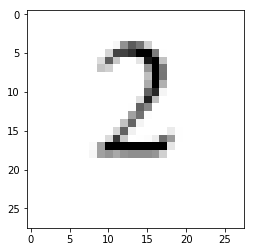

In [32]:
import imageio # Loads data from png image files

# test the neural network with our own images

# load image data from png files into an array

img_array = imageio.imread('/home/atanu/Desktop/mlds/codes/ann_rashid/2828_my_own_2.png', as_gray=True)
    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
# then scale data to range from 0.01 to 1.0
img_data = ((img_data / 255.0) * 0.99) + 0.01
print("min = ", np.min(img_data))
print("max = ", np.max(img_data))
#print(img_data)

# plot image
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("Network says ", label)